In [1]:
#import dependancies
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt

In [2]:
#set file and dataframe
file =pd.read_csv('final_data.csv')
file.head()

,Unnamed: 0,Colouring,Director,Critic Review Count,Duration,Director Facebook Likes,Actor 3 Facebook Likes,Actor 2,Actor 1 Facebook Likes,Gross,...,Tagline,Overview,Runtime,Production Companies,Release Date,Vote Count,Average Vote,Release Year,Adjusted Budget,Adjusted Revenue
0,3023,Color,Gil Junger,133.0,97.0,19.0,835.0,Heath Ledger,23000.0,38176108.0,...,How do I loathe thee? Let me count the ways.,"Bianca, a tenth grader, has never gone on a da...",97,Mad Chance|Jaret Entertainment|Touchstone Pict...,3/30/1999,947,7.2,1999,2.094485e+07,7.000575e+07
1,582,Color,Kevin Lima,84.0,100.0,36.0,439.0,Eric Idle,2000.0,66941559.0,...,Meet Two Unlikely Heroes With A Bone To Pick.,Get ready for a howling good time as an all ne...,100,Walt Disney Pictures|Cruella Productions,10/7/2000,150,5.0,2000,1.076348e+08,2.325061e+08
2,3482,Color,Robert Moresco,26.0,107.0,53.0,463.0,Brad Renfro,954.0,53481.0,...,"The Intersection Where Family, Honor and Betra...",A former street tough returns to his Philadelp...,107,Thinkfilm,2/19/2006,12,6.0,2006,8.653353e+06,1.551665e+05
3,3640,Color,Greg Marcks,68.0,85.0,9.0,407.0,Barbara Hershey,861.0,NaN,...,Fate can change in seconds.,Tells the seemingly random yet vitally connect...,86,Firm Films|Media 8 Entertainment|MDP Worldwide,5/16/2003,113,6.7,2003,7.112116e+06,0.000000e+00
4,4235,Black and White,Sidney Lumet,177.0,96.0,0.0,253.0,Lee J. Cobb,359.0,NaN,...,NaN,During the trial of a man accused of his fathe...,117,MGM Television,8/17/1997,37,7.5,1997,0.000000e+00,0.000000e+00


In [3]:
#limit data to essential information and drop na
df = pd.DataFrame(file[['Genres', 'Release Year', 'Gross']].dropna())
df = df.groupby(['Genres', 'Release Year']).mean()
df = df.reset_index()
df
print(df[df['Genres'] == 'Family'])

     Genres  Release Year        Gross
303  Family          1982  434949459.0
304  Family          2004   10411980.0


In [4]:
#remove the movies from non analysed years
df = df[df['Release Year'] >= 1995]
df = df[df['Release Year'] <= 2015]
df

,Genres,Release Year,Gross
33,Action,1995,4.963013e+07
34,Action,1996,7.475010e+07
35,Action,1997,6.214810e+07
36,Action,1998,6.389634e+07
37,Action,1999,8.612128e+07
...,...,...,...
379,Sci-Fi,2008,6.450591e+07
380,Sci-Fi,2010,5.612900e+04
381,Sci-Fi,2015,2.233103e+07
382,Thriller,2013,2.843000e+03


In [5]:
#Make pivot table for revenue
rdf = df.pivot(index='Release Year', columns='Genres', values='Gross')
rdf

Genres,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Horror,Mystery,Romance,Sci-Fi,Thriller,Western
Release Year,,,,,,,,,,,,,,,,
1995,4.963013e+07,1.290855e+08,NaN,3.528184e+07,3.412227e+07,2.927056e+07,NaN,3.098947e+07,NaN,NaN,1.512695e+07,NaN,NaN,NaN,NaN,NaN
1996,7.475010e+07,3.782230e+07,100117603.0,2.494982e+07,3.617818e+07,4.442900e+07,NaN,7.964564e+07,NaN,15171475.0,6.533263e+07,NaN,NaN,NaN,NaN,NaN
1997,6.214810e+07,9.217656e+07,3562749.0,2.763671e+07,5.692329e+07,3.696213e+07,6.171720e+05,8.290838e+07,NaN,NaN,5.852446e+07,4.892200e+05,NaN,NaN,NaN,NaN
1998,6.389634e+07,8.052682e+07,NaN,4.304885e+07,3.974965e+07,2.810142e+07,NaN,4.142345e+07,NaN,NaN,3.350279e+07,NaN,NaN,NaN,NaN,NaN
1999,8.612128e+07,8.464664e+07,72592865.0,2.385993e+07,3.215033e+07,5.905151e+07,NaN,4.198218e+07,NaN,46624929.0,4.047119e+07,2.347908e+07,NaN,NaN,NaN,NaN
2000,7.299355e+07,6.642832e+07,45542421.0,6.113399e+07,4.567789e+07,3.015102e+07,NaN,3.297286e+07,NaN,NaN,4.644069e+07,2.553088e+07,NaN,NaN,NaN,NaN
2001,6.825923e+07,9.452165e+07,21053139.0,5.223563e+07,3.426368e+07,5.267171e+07,1.293295e+06,2.986445e+07,NaN,98543351.5,2.137027e+07,2.197318e+07,NaN,NaN,NaN,NaN
2002,8.325049e+07,7.759927e+07,NaN,4.102419e+07,4.192203e+07,4.184481e+07,NaN,3.799187e+07,NaN,NaN,2.164434e+07,NaN,NaN,NaN,NaN,NaN
2003,8.436234e+07,7.472566e+07,NaN,1.627969e+07,5.392915e+07,2.036376e+07,NaN,2.391823e+07,NaN,NaN,3.688834e+07,2.809671e+07,NaN,NaN,NaN,NaN


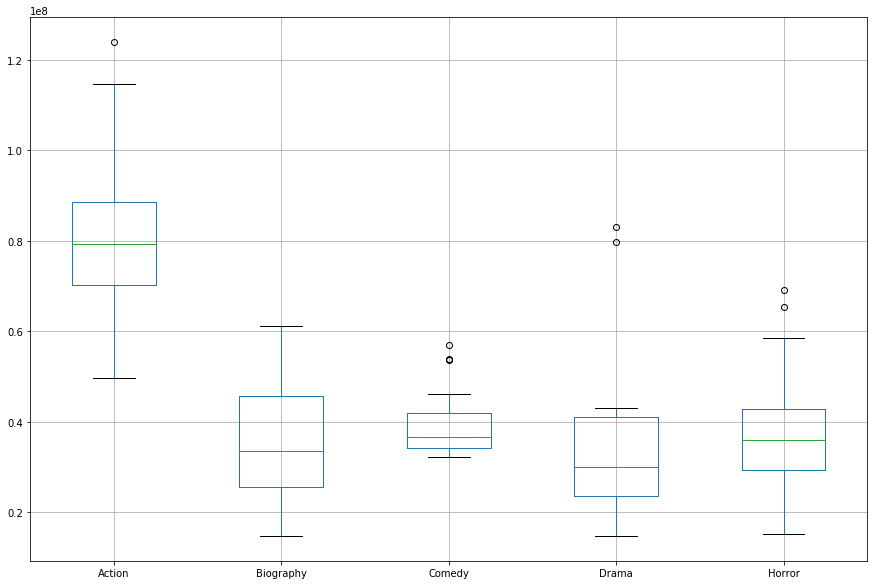

In [6]:
#Create a boxplot to view data with values for every year
rdf.boxplot(['Action', 'Biography', 'Comedy', 'Drama', 'Horror'], figsize=(15,10))

In [7]:
#Ttest for tested genres
s, p = stats.f_oneway(rdf['Action'], rdf['Biography'], rdf['Comedy'], rdf['Drama'], rdf['Horror'])
if p > .05:
    print(f'We have failed to reject our null hypothesis')
else:
    print(f'There is a {p*100}% chance that this is random, therefore we reject the null hypothesis')

There is a 2.1386547587243607e-17% chance that this is random, therefore we reject the null hypothesis


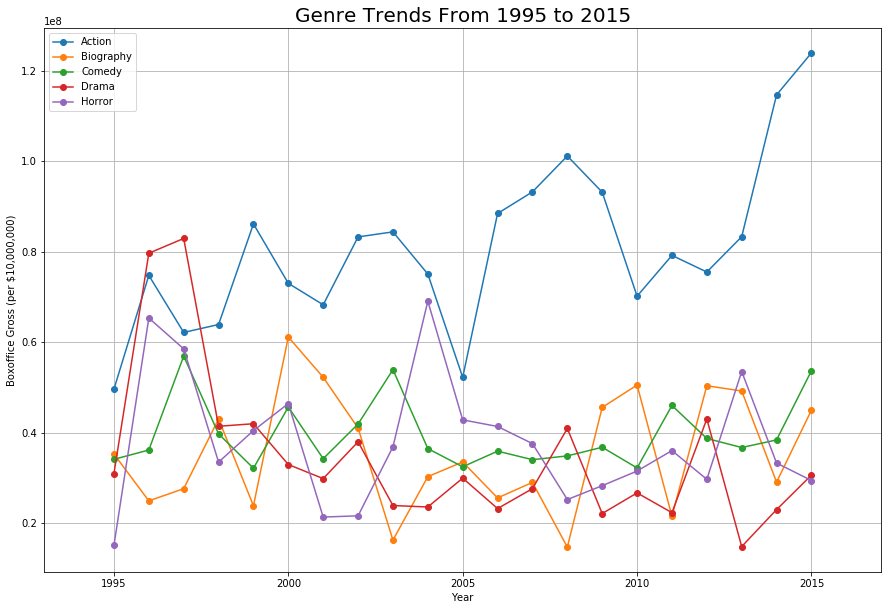

In [8]:
#Graph it up
labels = ['Action', 'Biography', 'Comedy', 'Drama', 'Horror']
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(rdf[['Action', 'Biography', 'Comedy', 'Drama', 'Horror']], marker='o')
ax.legend(labels)
plt.xlabel('Year')
plt.ylabel('Boxoffice Gross (per $10,000,000)')
plt.title('Genre Trends From 1995 to 2015', size=20)
plt.xlim(1993,2017)
plt.grid()